## Modelos de Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Está na aula 3 módulo 8
house = pd.read_csv("Módulo 8 - Estatística II/datasets/house_prices.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
nulos = house.isnull().sum()

In [5]:
house.drop(columns = nulos[nulos>0].index, inplace= True)
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
# Criando features e target

# features - Somente valores numéricos
X = house.drop(columns = ["Id", "SalePrice"])
X = X.select_dtypes(exclude = "object")

# target
y = house["SalePrice"]

In [7]:
# Separando treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

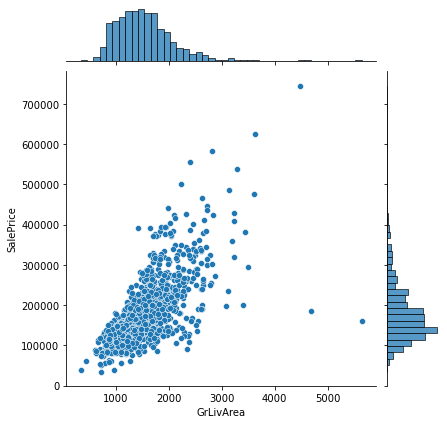

In [8]:
sns.jointplot(x = X_train["GrLivArea"], y = y_train)

In [9]:
# Dropando aqueles pontos no quadrante abaixo e a direita
idx_outliers = X_train.query("GrLivArea > 4500").index

In [10]:
y_train = y_train.drop(index = idx_outliers)
X_train = X_train.drop(index = idx_outliers)

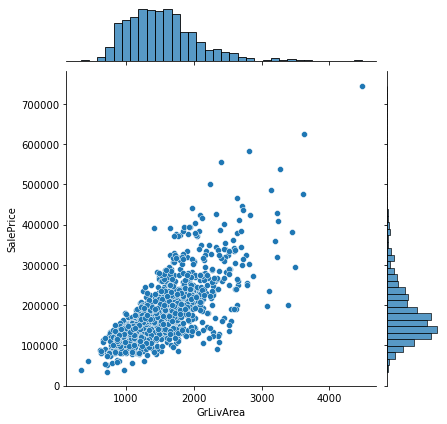

In [11]:
sns.jointplot(x = X_train["GrLivArea"], y = y_train)

#### Regressão Linear

In [12]:
from sklearn.linear_model import LinearRegression

reglin = LinearRegression().fit(X_train, y_train)

In [15]:
print(reglin.intercept_)
print(reglin.coef_)

-716527.4382439746
[-1.26375182e+02  5.32994082e-01  1.52872496e+04  4.57913246e+03
  4.05105414e+02  1.82715322e+02  2.51221840e+01 -4.47075182e+00
  1.36568464e+00  2.20171168e+01  2.27592477e+01  2.93947729e+01
 -1.22078395e+01  3.99461812e+01  1.63581381e+03 -5.77973247e+03
 -3.10496297e+03 -3.74510912e+03 -1.25577334e+04 -1.26441896e+04
  4.29293599e+03  1.42303597e+03  1.63552631e+03  2.14474628e+01
  1.02525626e+01  1.33477038e+01  1.39595880e+00  2.09349758e+01
  3.79580386e+01  6.26625954e+01 -1.73306325e+00 -3.41476788e+02
 -2.48959241e+02]


In [14]:
# Predict
y_pred = reglin.predict(X_test)

In [16]:
# Avaliando o modelo
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8438708842415236

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

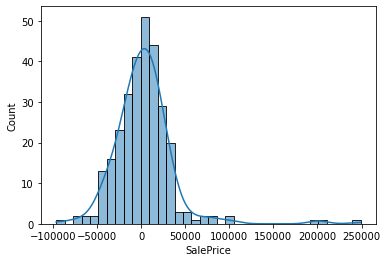

In [17]:
# Para avaliar se o modelo de regressão linear é ideal para os dados, avaliar a distribuição de resíduos
residuos = y_test - y_pred
sns.histplot(residuos, kde = True)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2f}")

MAE: 22079.30
MSE: 1197561248.31
RMSE: 34605.80
MAPE: 0.13


---

### Espaço de features polinomiais - No caso, 1 feature como uma função não linear

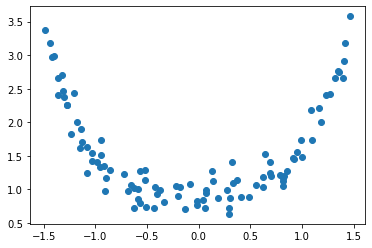

In [95]:
# Dados artificiais
np.random.seed(42)

N = 100
X = np.random.uniform(-1.5, 1.5, N)

b0, b1, b2, b3, b4 = 1, 0.1, 0, 0, 0.5
y = b0 + b1*X + b2*(X**2) + b3*(X**3) + b4*(X**4) + np.random.normal(0, 0.2, N)

plt.scatter(X, y)
plt.show()

In [96]:
# Como contém uma única feature, utilizar o reshape para alterar o formato do dado
X = X.reshape(-1, 1)

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
from sklearn.linear_model import LinearRegression
reglin_poli = LinearRegression().fit(X_train, y_train)

In [23]:
y_pred = reglin_poli.predict(X_test)

In [24]:
# Avaliando o modelo
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

-0.03786385003053816

In [30]:
print(reglin_poli.coef_)
print(reglin_poli.intercept_)

[0.0231754]
1.51173343473652


In [31]:
# Para plotar no gráfico, y_plot deve conter a equação
X_plot = np.linspace(X_train.min(), X_train.max(),1000)
y_plot = reglin_poli.intercept_ + reglin_poli.coef_*X_plot

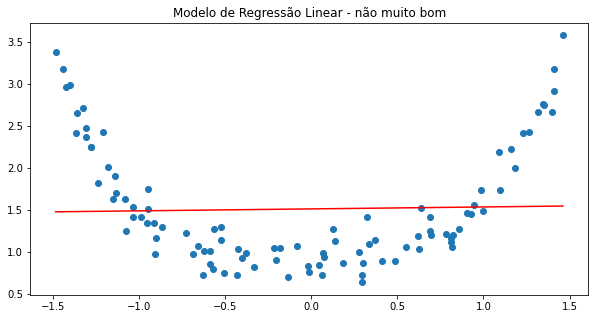

In [32]:
# Gráfico
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.plot(X_plot, y_plot, color = 'red')
plt.title("Modelo de Regressão Linear - não muito bom")
plt.show()

#### Para graus maiores

In [33]:
Z = pd.DataFrame(X, columns = ["X"])

In [34]:
Z["Y"] = Z["X"]**2
Z["A"] = Z["X"]**3
Z["B"] = Z["X"]**4
Z

,X,Y,A,B
0,-0.376380,0.141662,-0.053319,2.006802e-02
1,1.352143,1.828290,2.472110,3.342646e+00
2,0.695982,0.484391,0.337127,2.346344e-01
3,0.295975,0.087601,0.025928,7.674017e-03
4,-1.031944,1.064909,-1.098926,1.134030e+00
...,...,...,...,...
95,-0.018613,0.000346,-0.000006,1.200287e-07
96,0.068198,0.004651,0.000317,2.163212e-05
97,-0.217377,0.047253,-0.010272,2.232821e-03
98,-1.423743,2.027043,-2.885988,4.108904e+00


In [35]:
from sklearn.model_selection import train_test_split

X_train_quad, X_test_quad, y_train, y_test = train_test_split(Z, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.linear_model import LinearRegression

reglin_poli = LinearRegression().fit(X_train_quad, y_train)
y_pred_quad = reglin_poli.predict(X_test_quad)

In [39]:
reglin_poli.coef_

array([ 0.12981199,  0.20283771, -0.03624523,  0.42328406])

In [57]:
# Para plotar no gráfico, y_plot deve conter a equação
X_plot = np.linspace(X_train.min(), X_train.max(),80)
y_plot = reglin_poli.intercept_ 
for n, b_n in enumerate(reglin_poli.coef_):
    y_plot = y_plot + b_n*(X_plot**(n+1))

In [58]:
len(y_train)

80

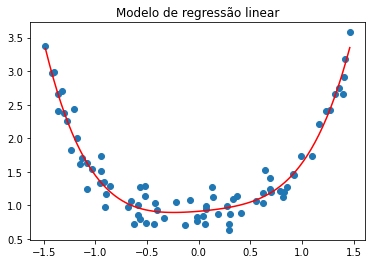

In [60]:
plt.title("Modelo de regressão linear")

plt.scatter(X_train, y_train)

plt.plot(X_plot, y_plot, color="red")
plt.show()

#### Usando sklearn.preprocessing.PolynomialFeatures

In [98]:
# Transformando X_train e X_test
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=4, include_bias=False).fit(X_train)
X_train2 = pf.transform(X_train)
X_test2 = pf.transform(X_test)

In [100]:
from sklearn.linear_model import LinearRegression

reglin_poli = LinearRegression().fit(X_train2, y_train)

In [101]:
y_pred = reglin_poli.predict(X_test2)

In [103]:
# Avaliando o modelo
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.934136337223147

In [104]:
for n, b_n in enumerate(reglin_poli.coef_):
    print(n, b_n)

0 0.12981199477127206
1 0.20283770734711135
2 -0.036245232709907926
3 0.42328406396489565


In [105]:
x_plot_modelo = np.linspace(X_train2.min(), X_train2.max(), len(X_train2))
y_plot_modelo = reglin_poli.intercept_ 

for n, b_n in enumerate(reglin_poli.coef_):
    y_plot_modelo = y_plot_modelo + b_n*(x_plot_modelo**(n+1))

In [106]:
len(x_plot_modelo)

80

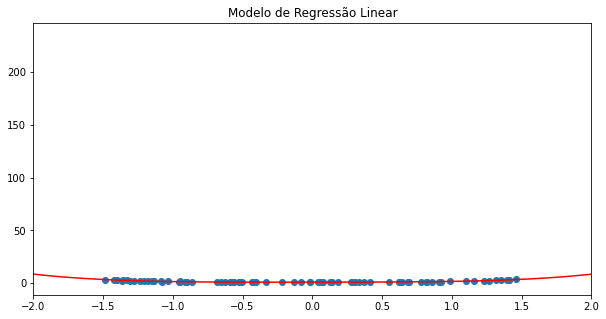

In [114]:
# Gráfico
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train)
plt.plot(x_plot_modelo, y_plot_modelo, color = 'red')
plt.title("Modelo de Regressão Linear")
plt.xlim(-2, 2)
plt.show()